<a href="https://colab.research.google.com/github/JhonyMitis/Modelado_Simulacion/blob/master/Proyecto_Modelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Oscilador Armónico**

## **Oscilador armónico simple**

$$F=ma =m\frac{\partial^2 x}{\partial t^2}=-kx$$

La solución a esta ecuación es:

$$x(t)= Acos(\omega t+\varphi )$$

donde: 

$\omega =\sqrt{\frac{k}{m}}$

## **Oscilador armónico amortiguado**
$$F=-kx-c\frac{\partial x}{\partial t}=m\frac{\partial^2 x}{\partial t^2}$$
$$\frac{\partial^2 x}{\partial t^2}+2\zeta \omega _{0}\frac{\partial x}{\partial t}+\omega _{0}^{2}x=0$$

Donde:

$\omega _{0}=\sqrt{\frac{k}{m}}: $ es la frcuencia angular del oscilador "parte no amortiguada"

$\zeta =\frac{c}{2\sqrt{mk}}: $ es el factor de amortiguamiento


## **Oscilador armónico driven o de forzamiento externo**

$$F(t)-kx-c\frac{\partial x}{\partial t}=m\frac{\partial^2 x}{\partial t^2}$$

$$\frac{\partial^2 x}{\partial t^2}+2\zeta \omega _{0}\frac{\partial x}{\partial t}+\omega _{0}^{2}x=\frac{F(t)}{m}$$

## **Oscilador armónico de duffing o cuártico**

$$\ddot{x} +\delta \dot{x}+\alpha x+\beta x^{3}=\gamma cos(wt)$$


In [2]:
import numpy as np 
import matplotlib.pyplot as plt

# **Oscilador de duffing**

## **Gráfica de tiempo y fase**

In [13]:
from scipy.integrate import solve_ivp

gamma=np.array([0.2,0.28,0.29,0.37,0.5,0.65,10])
delta=0.3
beta=1
alfa=-1
w=1.2
def Duffing(t,v,*_):
    x,y = v
    return [y, gamma[i]*np.cos(w*t)-delta*y-alfa*x-beta*x**3]

time = [0,50]
t = np.arange(time[0],time[1],0.001)
x0,x1= np.array([1,0.0])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance

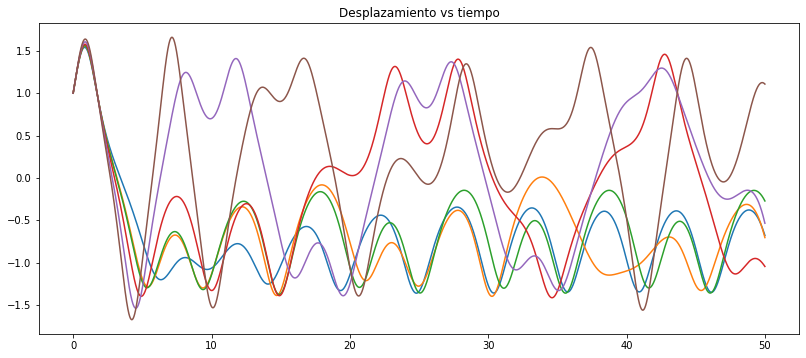

In [16]:
fig1 = plt.figure(figsize=(30,40))
j=1
for i in range (0,len(gamma)-1):
    sol = solve_ivp(Duffing,time,y0=[1,1],args=[delta,alfa,beta,gamma,w],t_eval=t)
    desp = sol.y[0]
    vel = sol.y[1]
    ax1 =fig1.add_subplot(6,2,j)
    ax1.plot(t,desp)
    ax1.title.set_text('Desplazamiento vs tiempo')

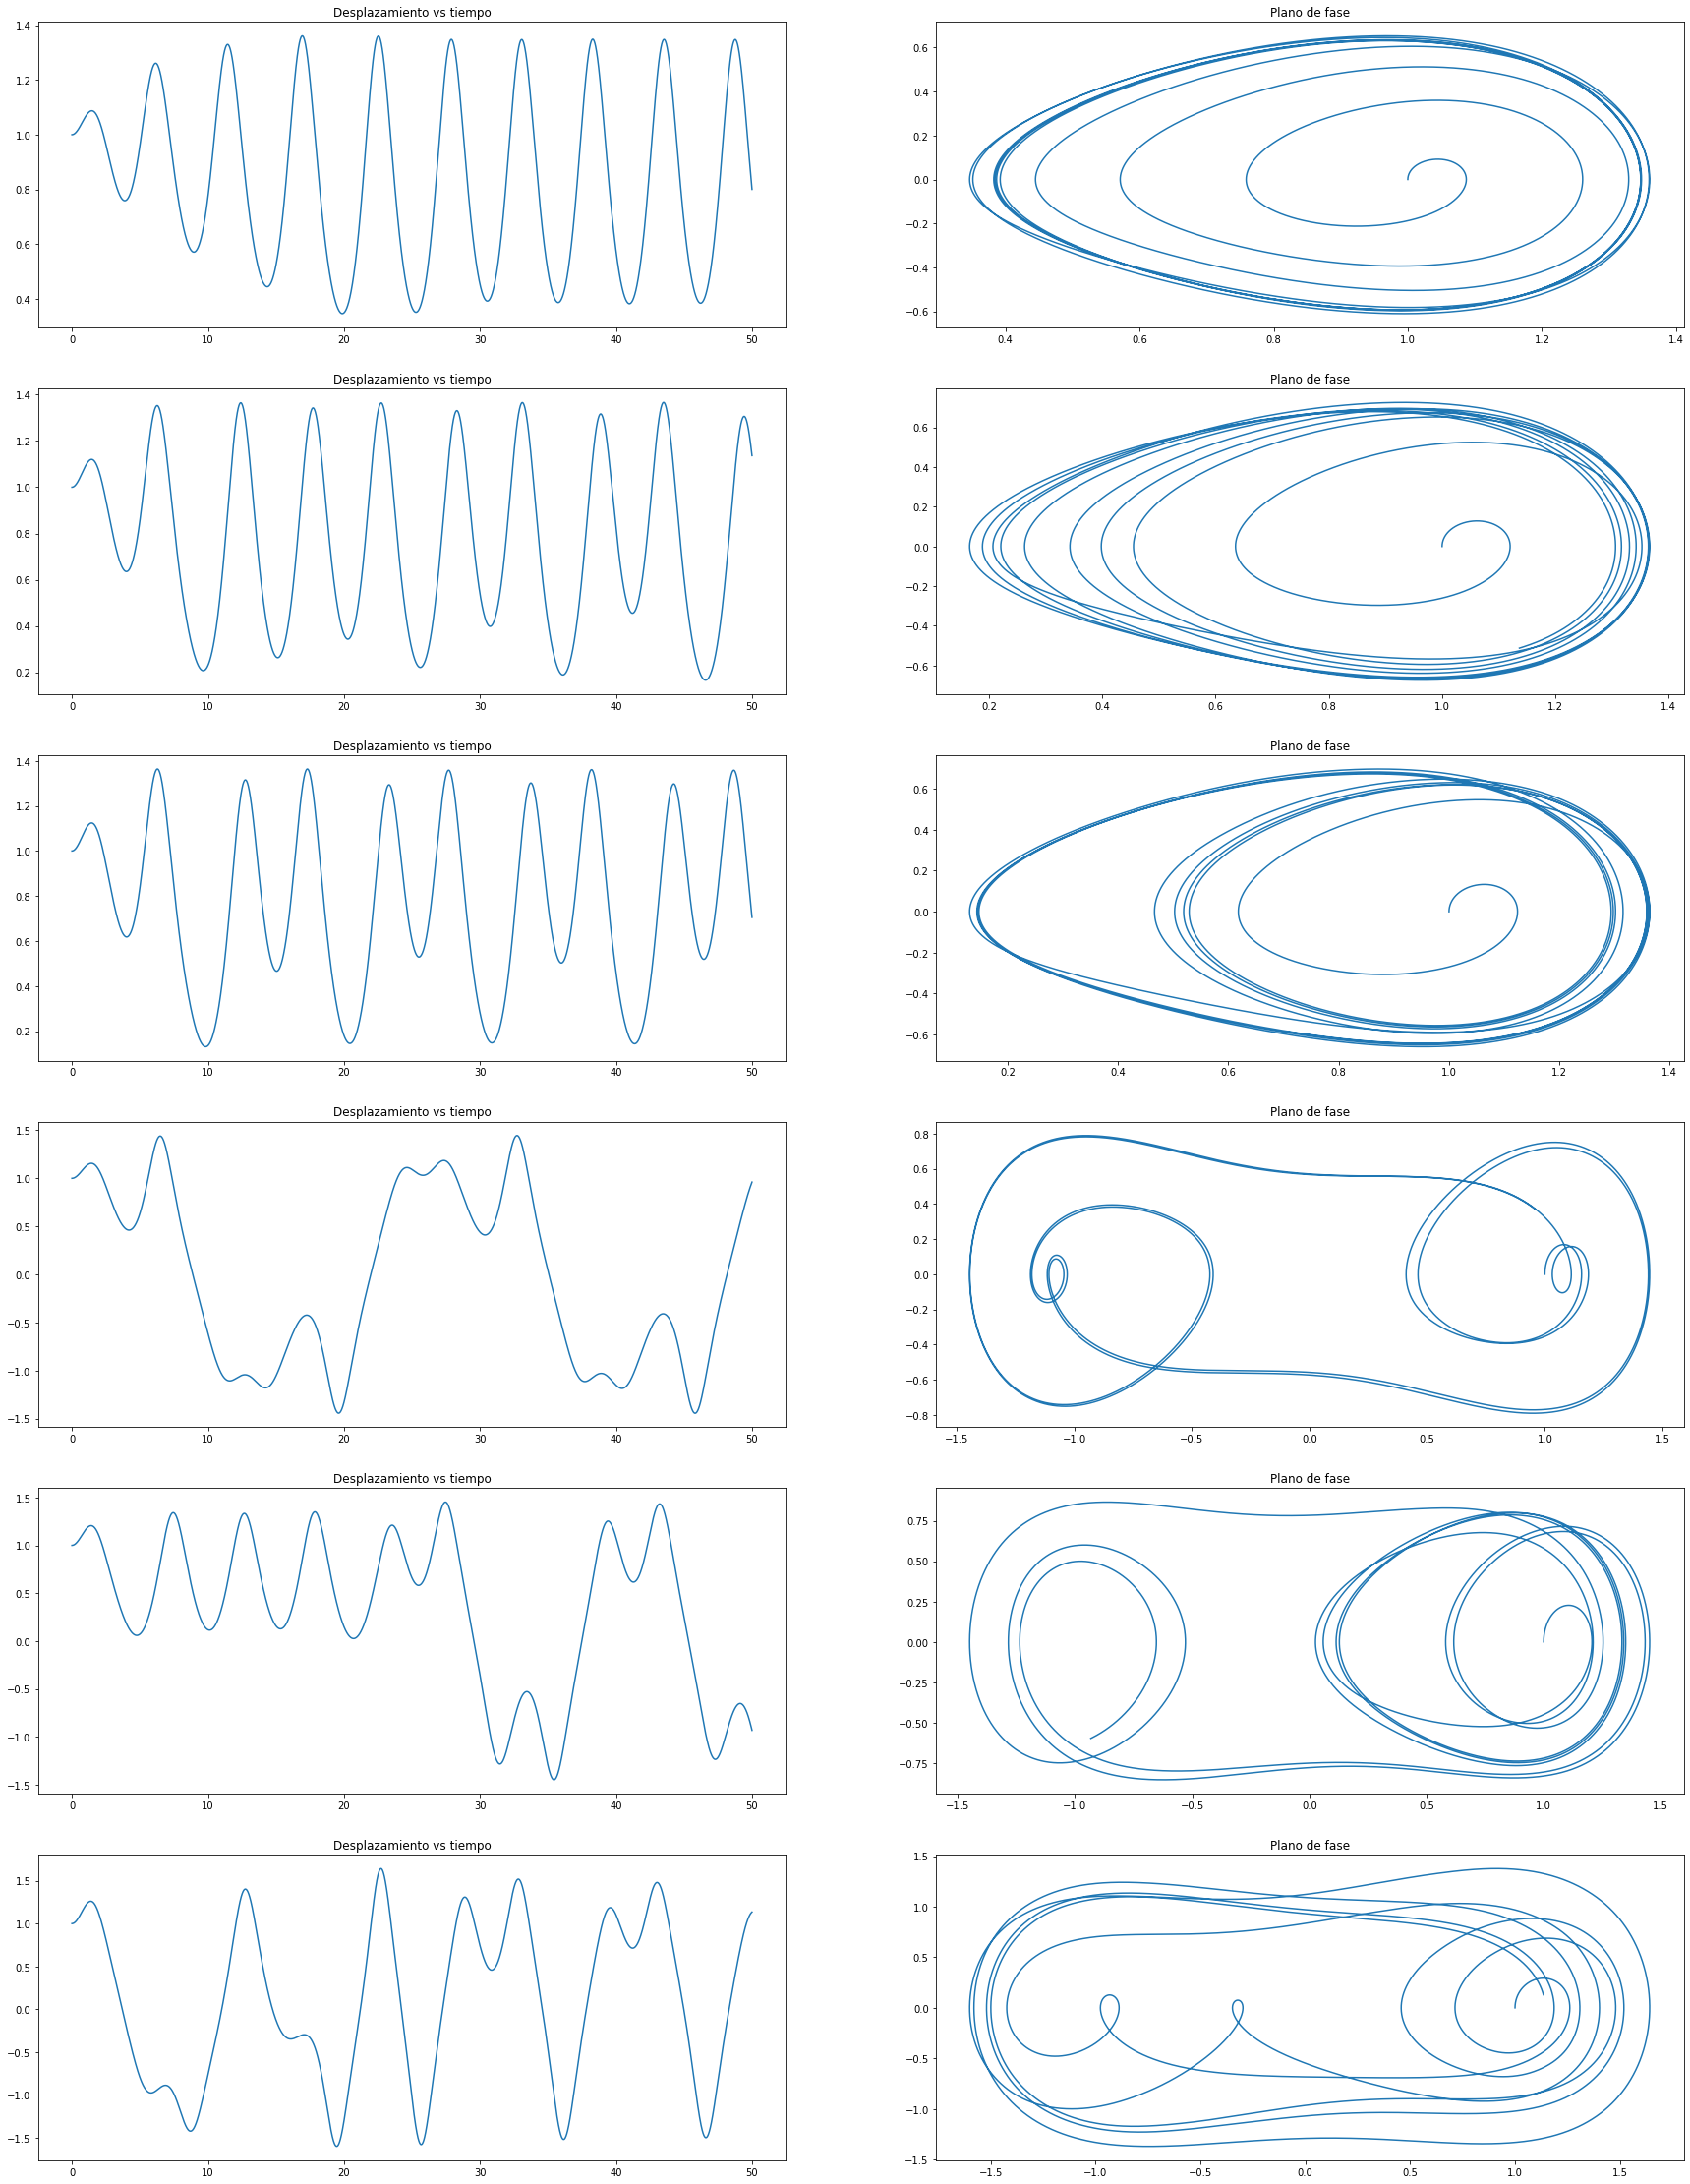

In [4]:
fig = plt.figure(figsize=(30,40))
j=1
for i in range (0,len(gamma)-1):
    sol = solve_ivp(Duffing,time,x0,args=[delta,alfa,beta,gamma,w],t_eval=t)
    desp = sol.y[0]
    vel = sol.y[1]
    ax1 =fig.add_subplot(6,2,j)
    ax1.plot(t,desp)
    ax1.title.set_text('Desplazamiento vs tiempo')

    ax2 = fig.add_subplot(6,2,j+1)
    ax2.plot(desp,vel)
    ax2.title.set_text('Plano de fase')
    j=j+2

## **Movimiento oscilatorio simple del oscilador de duffing**

In [5]:
from scipy.integrate import solve_ivp
from scipy import integrate
gamma=0.3
delta=800
beta=0.1
alfa=2
w=1.0669
def Duffing(v,t):
    x,y = v
    return [y , gamma*np.cos(w*t)-delta*y-alfa*x+beta*x**3]                #

time = [0,100]
t = np.arange(time[0],time[1],0.001)
x0= [0,0]

sol1 = integrate.odeint(Duffing,x0,t)




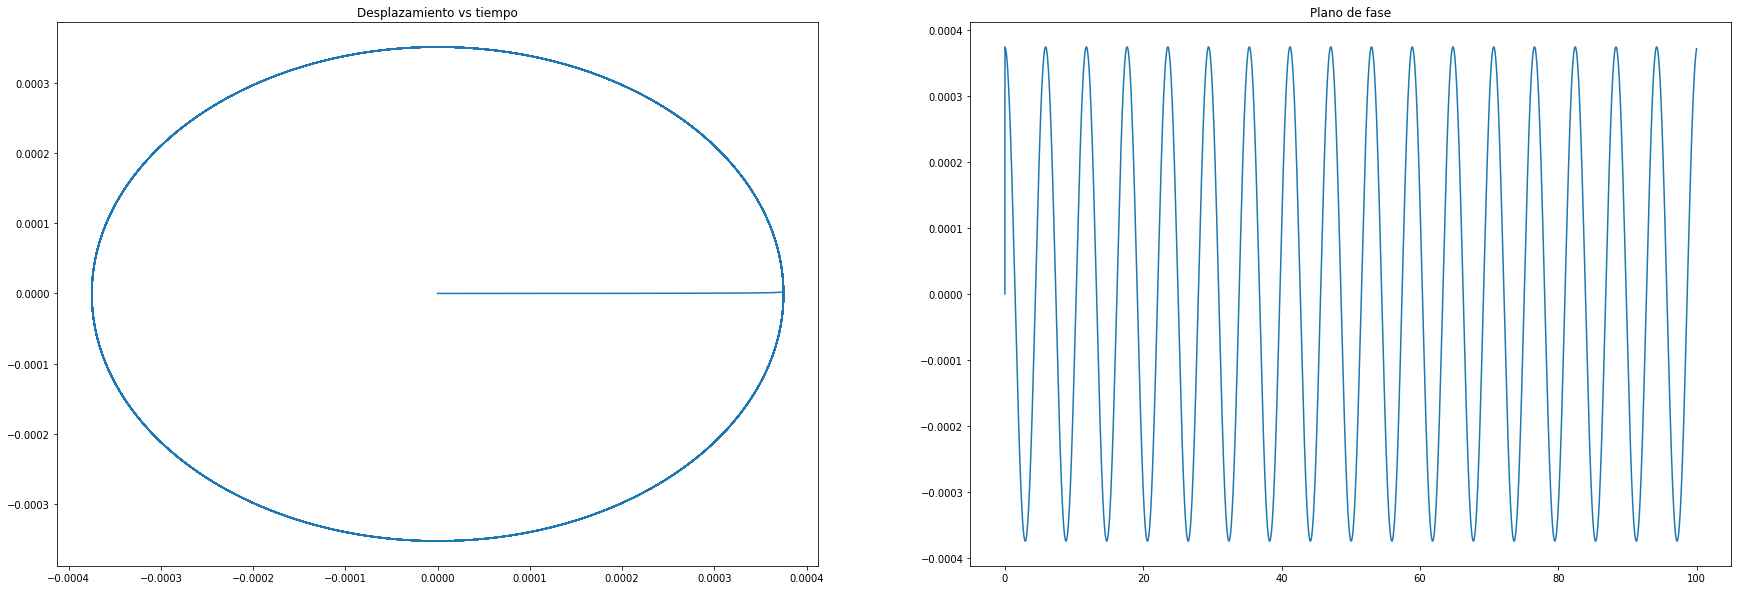

In [6]:
fig = plt.figure(figsize=(30,10))
ax1 =fig.add_subplot(1,2,1)
ax1.plot(sol1[:,1],sol1[:,0])
ax1.title.set_text('Desplazamiento vs tiempo')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(t,sol1[:,1])
ax2.title.set_text('Plano de fase')




## **Diagrama de bifurcaciones**

In [7]:
time = (0,1000)
t = np.arange(0,1000,0.05)
gamma1 = 0.5

def event(t,v,*__):
    x,y = v
    return x+y

event.direction = -1

def Duffing1(t,v,*_):
    x,y = v
    return [y, gamma1*np.cos(w1*t)-delta1*y-alfa1*x-beta1*x**3]

def root(t,y,*_): return y[0]-y[1]



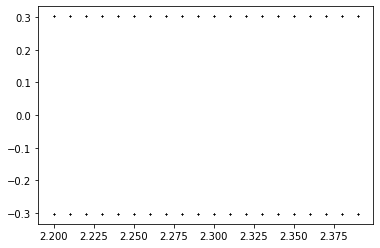

In [8]:
gamma1 = 0.5
delta1 = 0.3

rs = np.arange(2.2,2.4,0.01)
for r in rs:
    solucion = solve_ivp(Duffing1,time,x0,events=[root], args =[delta1,alfa,beta,gamma1,w], t_eval = t)
    for i,t_ in enumerate(solucion.t_events[0]):
        if t_>500 :
            plt.plot(r,solucion.y_events[0][i,1],'.k',markersize=0.3)
    x0 = solucion.y[:,-1]

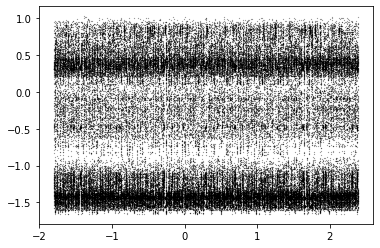

In [12]:
gamma1 = 8
delta1 = 0.02
alfa1 = 1
beta1 = 5
w1 = 0.5

rs = np.arange(-1.8,2.4,0.01)
for r in rs:
    solucion = solve_ivp(Duffing1,time,x0,events=[event], args =[delta1,alfa1,beta1,gamma1,w1], t_eval = t)
    for i,t_ in enumerate(solucion.t_events[0]):
        if t_>500 :
            plt.plot(r,solucion.y_events[0][i,1],'.k',markersize=0.3)
    x0 = solucion.y[:,-1]
plt.show()  